In [137]:
import pandas
import numpy

import sklearn
import sklearn.datasets

import sklearn.model_selection

import seaborn

_Решим задачу классификации цветков ириса по их морфологическим признакам_.

### Загружаем набор данных Iris

In [138]:
iris_db = sklearn.datasets.load_iris()

### Посмотрим, что внутри

In [139]:
print(iris_db['DESCR'])
iris_data = iris_db['data']
iris_target = iris_db['target']

feature_names = iris_db['feature_names']
target_classes = iris_db['target_names']
target = 'Species'

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Приготовим pandas DataFrame, с ним обычно удобнее работать, чем просто с массивами

In [140]:
df = pandas.DataFrame(data=iris_data, columns=feature_names)
df[target] = iris_target

### Посмотрим на сами данные

In [141]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [142]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


_Ничего плохого в данных заранее не видно_.

### Можно начать анализ с построения гистограмм по каждому параметру
_Если атрибутов много, то можно выбрать наиболее значимые их них с помощью PCA или SVC_.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020A65CF8>,
      dtype=object)

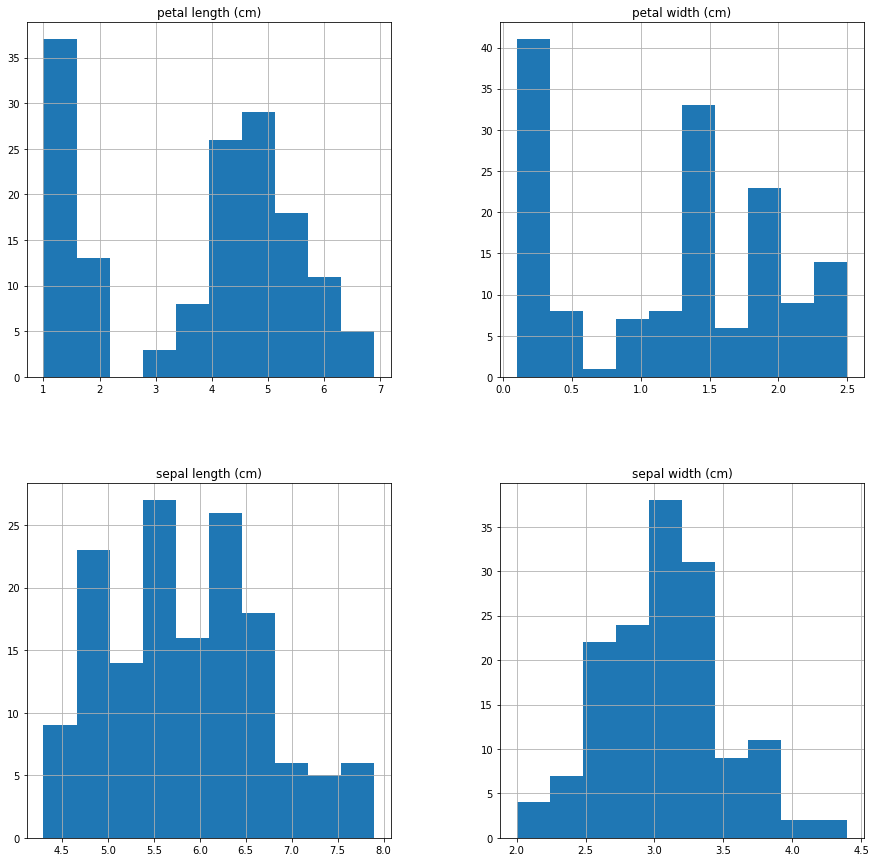

In [144]:
df[feature_names].hist(figsize=(15,15))

_Сразу видно, что "petal length" и "petal width" имеют характерные "выбросы", что позволяет предпложить, что эти атрибуты могут быть определяющими в классификации растения_.

### Посмотрим, как параметры (или атрибуты или фичи) влияют на результирующее значение
_Это удобно делать с помощью точечной диаграммы (scatter plot)._

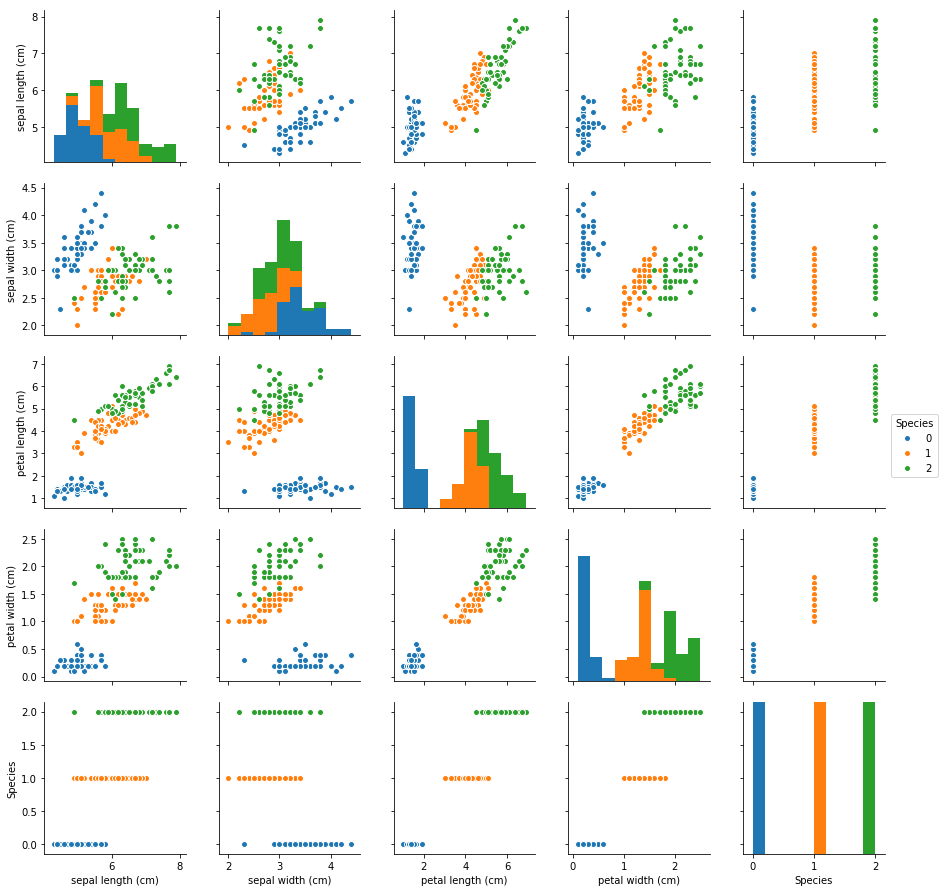

In [145]:
seaborn.pairplot(df, hue=target)

_Видно, что значения очень хорошо группируются, то есть в наличии хорошие соответствия между атрибутами по отношению к классу растения._

### Посмотрим на распределение значений атрибутов по отношение к целевому параметру с помощью "ящиков с усами"

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


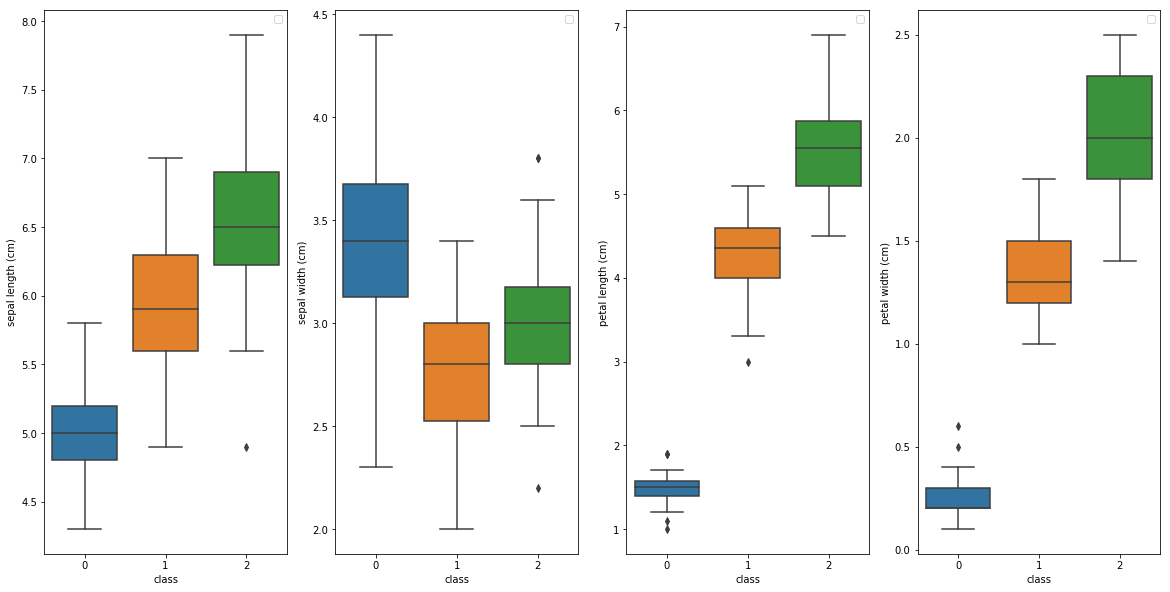

In [96]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

for i, fn in enumerate(feature_names):
    seaborn.boxplot(data=df, y=fn, x=target, orient='v', ax=axes[i % 4])
    axes[i % 4].legend()
    axes[i % 4].set_xlabel(target)
    axes[i % 4].set_ylabel(fn)

_Тоже хорошо видно,что "petal length" и "petal width" почти не пересекаются и имеют очень небольшие выбросы, для "sepal length" и "sepal width" похуже, но тоже можно предположить, что классификация ирисов не будет очень сложной задачей_

_Кстати, вместо "ящиков с усами" можно построить диаграммы-скрипки, чтобы оценить интегральные характеристики (сколько всего значений в указанных интервалах атрибутов для заданных классов пересекаются друг с другом)_.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


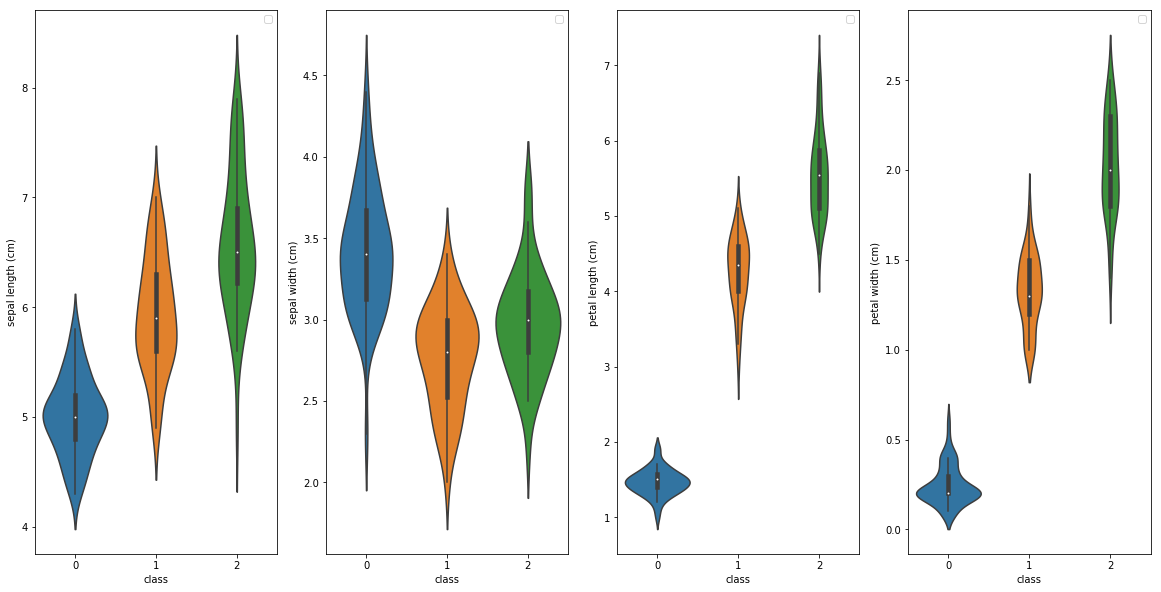

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

for i, fn in enumerate(feature_names):
    seaborn.violinplot(data=df, y=fn, x=target, orient='v', ax=axes[i % 4])
    axes[i % 4].legend()
    axes[i % 4].set_xlabel(target)
    axes[i % 4].set_ylabel(fn)

_Можно уже не продолжать исследования входных атрибутов. Уже сейчас видно, что задачу построения модели классификатора ирисов лучше всего решать с помощью дерева решений (можно также использовать случайный лес) или алгоритма кластеризации. Исходя из попарной точечной диаграммы можно сказать, что дерево решений скорее всего даст такие же или немного лучшие результаты, чем кластеризация.
Поскольку "вкраплений" на точечной диаграмме сравнительно немного, то дерева решений должно быть достаточно. Если бы таких "вкраплений" было больше, то их лучше сразу попробовать покрыть их с помощью случайных лесов (если, конечно, хватает входных данных)_.

### Вспомогательные функции для оценки качества моделей

In [149]:
from typing import Any
import sklearn.metrics

def calc_model_accuracy(model: Any,
                        ds: pandas.DataFrame,
                        real: pandas.DataFrame) -> float:
    predicted = model.predict(ds)
    return sklearn.metrics.accuracy_score(real, predicted)

def calc_model_confusion_matrix(model: Any,
                                ds: pandas.DataFrame,
                                real: pandas.DataFrame) -> float:
    predicted = model.predict(ds)
    return sklearn.metrics.confusion_matrix(real, predicted)

def evaluate_model(model, train_X, test_X, train_Y, test_Y) -> None:
    print(f'Train accuracy: {calc_model_accuracy(model, train_X, train_Y)}')
    print(f'Test accuracy: {calc_model_accuracy(model, test_X, test_Y)}')
    print(f'Confusion matrix: {calc_model_confusion_matrix(model, test_X, test_Y).tolist()}')

### Разбиваем на тренировочный и тестовый наборы

In [150]:
train_X, test_X, train_Y, test_Y = sklearn.model_selection.train_test_split(df[feature_names],
                                                                            df[target],
                                                                            test_size=0.3,
                                                                            random_state=42)

### Моделируем с помощью дерева решений

In [151]:
import sklearn.tree
dtc = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_features=None, random_state=42, class_weight='balanced')
dtc.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [152]:
evaluate_model(dtc, train_X, test_X, train_Y, test_Y)

Train accuracy: 1.0
Test accuracy: 1.0
Confusion matrix: [[19, 0, 0], [0, 13, 0], [0, 0, 13]]


### Теперь попробуем кластеризацию (using K-Means)

In [153]:
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=len(target_classes), random_state=42)
kmeans.fit(train_X)
pandas.crosstab(train_Y, kmeans.labels_)

col_0,0,1,2
Species,,,
0,0,31,0
1,34,0,3
2,11,0,26


In [154]:
train_Y_remapped = train_Y.map({0: 1, 1: 0, 2: 2})
test_Y_remapped = test_Y.map({0: 1, 1: 0, 2: 2})

In [155]:
evaluate_model(kmeans, train_X, test_X, train_Y_remapped, test_Y_remapped)

Train accuracy: 0.8666666666666667
Test accuracy: 0.9333333333333333
Confusion matrix: [[13, 0, 0], [0, 19, 0], [3, 0, 10]]


### Теперь возьмём поменьше входных атрибутов, чтобы подтвердить тезис, что не все атрибуты одинаково полезны
_Только "petal width" и "petal length"_

In [156]:
reduced_feature_set = ['petal length (cm)', 'petal width (cm)']
dtc = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_features=None, random_state=42, class_weight='balanced')
dtc.fit(train_X[reduced_feature_set], train_Y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [157]:
evaluate_model(dtc, train_X[reduced_feature_set], test_X[reduced_feature_set], train_Y, test_Y)

Train accuracy: 0.9904761904761905
Test accuracy: 1.0
Confusion matrix: [[19, 0, 0], [0, 13, 0], [0, 0, 13]]


_Таким образом, достаточно знать "petal width" и "petal length" для решения задачи классификации растений на **выбранном** наборе данных. Строго говоря, на новых данных могут быть и будут отклонения, но деревья решений способны нивелировать эту проблему. Вообще, для таких случаев лучше сразу выбирать случайный лес для построения модели, которая учитывает возможные "вылеты" в новых данных._